In [1]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split, LearningCurveDisplay, StratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.metrics import RocCurveDisplay, roc_auc_score, ConfusionMatrixDisplay, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import clone

In [2]:
df = pd.read_csv('data/augmented_dataset.csv', index_col='id')

features = [i for i in df.columns if i != 'class']
target = 'class'

X, y = df.loc[:, features], df.loc[:, target]

In [3]:
# Use the random state as in ``training.ipynb``.
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y, train_size=0.9, random_state=1)

### Build a dummy classifier

In [4]:
# Dummy classifier that predics the most frequent class.
dummy = DummyClassifier(strategy='most_frequent')

In [5]:
dummy.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

### Load the model

In [6]:
model = joblib.load('saved_models/best_model.joblib')
model

Pipeline(steps=[('scaler', StandardScaler()),
                ('reducer',
                 PCA(n_components=50,
                     random_state=RandomState(MT19937) at 0x7F11B1AEB740)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               fea...olicy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=2000, n_jobs=None,
                               num_parallel_tree=None, random_state=1791095845, ...))])

# Visualize the results

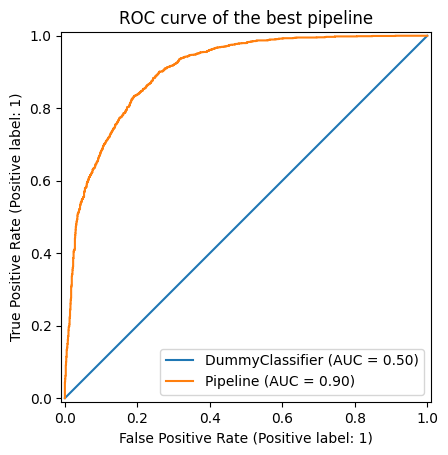

In [8]:
fig, ax = plt.subplots()

for clf in [dummy, model]:
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax)
ax.set_title('ROC curve of the best pipeline')

plt.savefig('figures/roc.pdf')

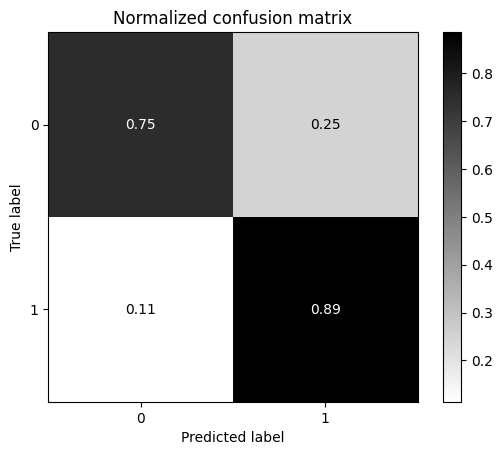

In [19]:
fig, ax = plt.subplots()

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize='true', cmap='binary', ax=ax)
ax.set_title('Normalized confusion matrix')

plt.savefig('figures/confusion_matrix.pdf')

In [10]:
scores_test = model.predict_proba(X_test)[:, 1]

In [11]:
scores_test_neg = scores_test[y_test == 0]
scores_test_pos = scores_test[y_test == 1]

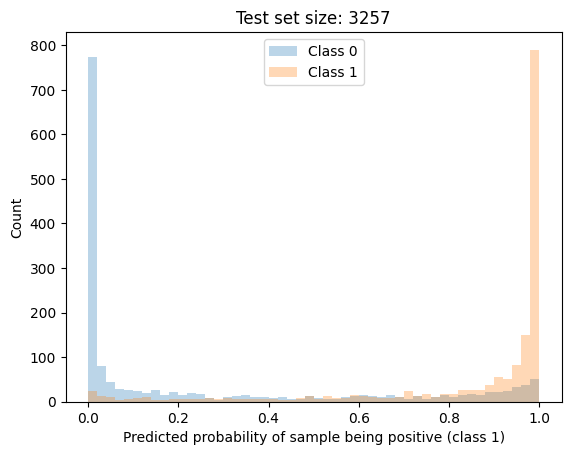

In [12]:
fig, ax = plt.subplots()

ax.hist(scores_test_neg, bins=50, label='Class 0', alpha=0.3);
ax.hist(scores_test_pos, bins=50, label='Class 1', alpha=0.3);
ax.set_ylabel('Count')
ax.set_xlabel('Predicted probability of sample being positive (class 1)')
ax.set_title(f'Test set size: {len(y_test)}')
ax.legend(loc='upper center')

plt.savefig('figures/class_scores.pdf')